In [199]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Breed Project/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
labels_csv["breed"].value_counts().median()

82.0

In [9]:
import IPython

In [10]:
from IPython.display import Image

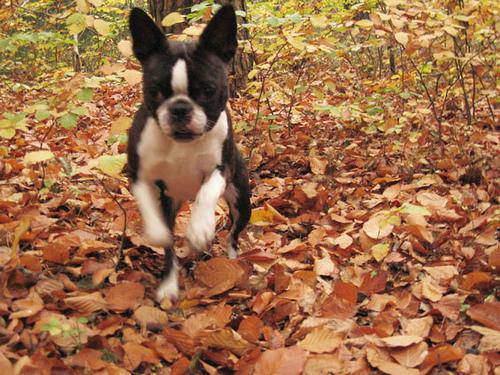

In [11]:
Image("/content/drive/MyDrive/Dog Breed Project/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [12]:
filenames = ["/content/drive/MyDrive/Dog Breed Project/train/" + fname + ".jpg"for fname in labels_csv["id"]]

In [13]:
import os

In [14]:
if len(os.listdir("/content/drive/MyDrive/Dog Breed Project/train/")) == len(filenames):
  print("ok")
else:
  print("nah")

nah


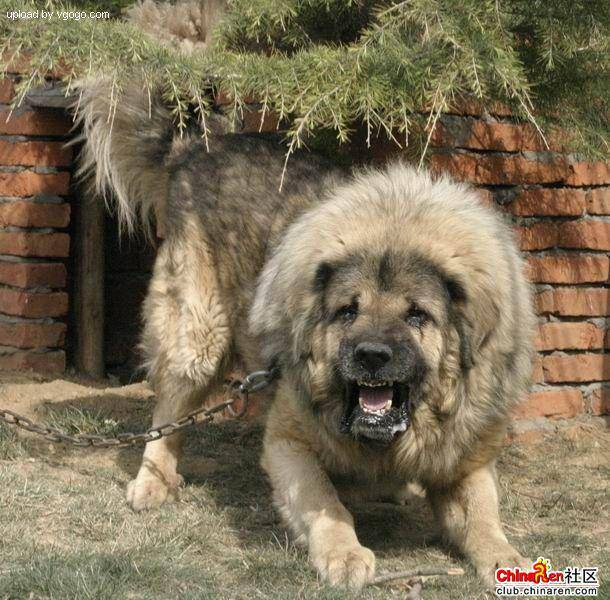

In [15]:
Image(filenames[9000])

In [16]:
labels_csv["breed"][9000]

'tibetan_mastiff'

TURNING DATA LABELS INTO NUMBERS


In [17]:
import numpy as np

In [18]:
labels = labels_csv["breed"].to_numpy()

In [19]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [20]:
if len(labels) == len(filenames):
  print("matches")

else:
  print("no match")

matches


In [21]:
unique_breeds = np.unique(labels)

In [22]:
result = np.isin(unique_breeds, labels[0])
result

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
labels[0] == unique_breeds
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
X = filenames
Y = boolean_labels

In [25]:
NUM_Images = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [26]:

from sklearn.model_selection import train_test_split

In [27]:
X = filenames
Y = boolean_labels
X_train, X_val, Y_train, Y_val = train_test_split(X[:NUM_Images],
                                                  Y[:NUM_Images],
                                                  test_size = 0.2,
                                                  random_state=42) 

Turning images into tensors

In [94]:
img_size = 224
input = "/content/drive/MyDrive/Dog Breed Project/train/000bec180eb18c7604dcecc8fe0dba07.jpg"
def process_image(image_path, img_size):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image


In [95]:
process_image(image_path=input, img_size=img_size)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.4601166 , 0.26022965],
        [0.61062384, 0.43763596, 0.21601713],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252918 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.30642927],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.5883547 , 0.4322571 , 0.2403155 ],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.86072475, 0.74250627, 0.3694122 ],
        [0.76781666, 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.42554107, 0.27039403, 0.12009468],
        [0.7887875 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.7696401 , 0.41811958],
        [0.88609535, 0.7585918 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.71

In [96]:
# Turning data into batches

#Create a function to return a tuple
def get_image_label(image_path, label):
  image = process_image(image_path, img_size)
  return image, label

In [97]:
get_image_label(input, boolean_labels)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5705322 , 0.33588538, 0.15008473],
         [0.66901225, 0.4601166 , 0.26022965],
         [0.61062384, 0.43763596, 0.21601713],
         ...,
         [0.8182312 , 0.7297958 , 0.26963907],
         [0.72454786, 0.6059109 , 0.2653059 ],
         [0.7494603 , 0.6252918 , 0.32456532]],
 
        [[0.6761415 , 0.4733761 , 0.30642927],
         [0.5672121 , 0.38192675, 0.20349538],
         [0.5883547 , 0.4322571 , 0.2403155 ],
         ...,
         [0.9326942 , 0.8260503 , 0.41093278],
         [0.86072475, 0.74250627, 0.3694122 ],
         [0.76781666, 0.6461604 , 0.29291284]],
 
        [[0.46350825, 0.29595745, 0.1536156 ],
         [0.42554107, 0.27039403, 0.12009468],
         [0.7887875 , 0.6547362 , 0.49015   ],
         ...,
         [0.89372385, 0.7696401 , 0.41811958],
         [0.88609535, 0.7585918 , 0.36495727],
         [0.8243601 , 0.69494826, 0.2930575 ]],
 
        ...,
 
        [[0.7344025 , 0.4716574 

## CONVERT DATA INTO BATCHES

In [114]:
BATCH_SIZE = 32
def create_data_batches(X, batch_size, y=None, valid_data=False, test_data=False):
  """
  Creates batches of data out of image and label pairs.
  Shuffles the data if it is training data but doesnot shuffle validation data
  """
  if test_data == True:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  elif valid_data == True:
    if y is not None:
      print("Creating validation data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
      data_batch = data.map(get_image_label).batch(batch_size)
      return data_batch
    else:
      print("Validation labels are None")
      return None

  else:
    if y is not None:
      print("Creating training data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                 tf.constant(y)))
      data = data.shuffle(buffer_size=len(X))
      data = data.map(get_image_label)
      data_batch = data.batch(batch_size)
      return data_batch
    else:
      print("Training labels are None")
      return None

In [123]:
def create_data_batches(X, y, batch_size, img_size, valid_data=False, test_data=False):
  """
  Creates batches of data out of image and label pairs.
  Shuffles the data if it is training data but doesnot shuffle validation data
  """
  if test_data == True:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(lambda x: process_image(x, img_size)).batch(batch_size)
    return data_batch
  
  elif valid_data == True:
    if y is not None:
      print("Creating validation data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
      data_batch = data.map(lambda x, y: get_image_label(x, y, img_size)).batch(batch_size)
      return data_batch
    else:
      print("Validation labels are None")
      return None

  else:
    if y is not None:
      print("Creating training data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                 tf.constant(y)))
      data = data.shuffle(buffer_size=len(X))
      data = data.map(lambda x, y: get_image_label(x, y, img_size))
      data_batch = data.batch(batch_size)
      return data_batch
    else:
      print("Training labels are None")
      return None

In [99]:
train_data = create_data_batches(X_train, batch_size=32, y=Y_train, valid_data=False, test_data=False)

Creating training data batches...


In [36]:
val_data = create_data_batches(X_val, batch_size=32, y=Y_val, valid_data=True)

Creating validation data batches...


In [37]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [38]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data branch
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])

In [39]:
train_images, train_labels = next(train_data.as_numpy_iterator())

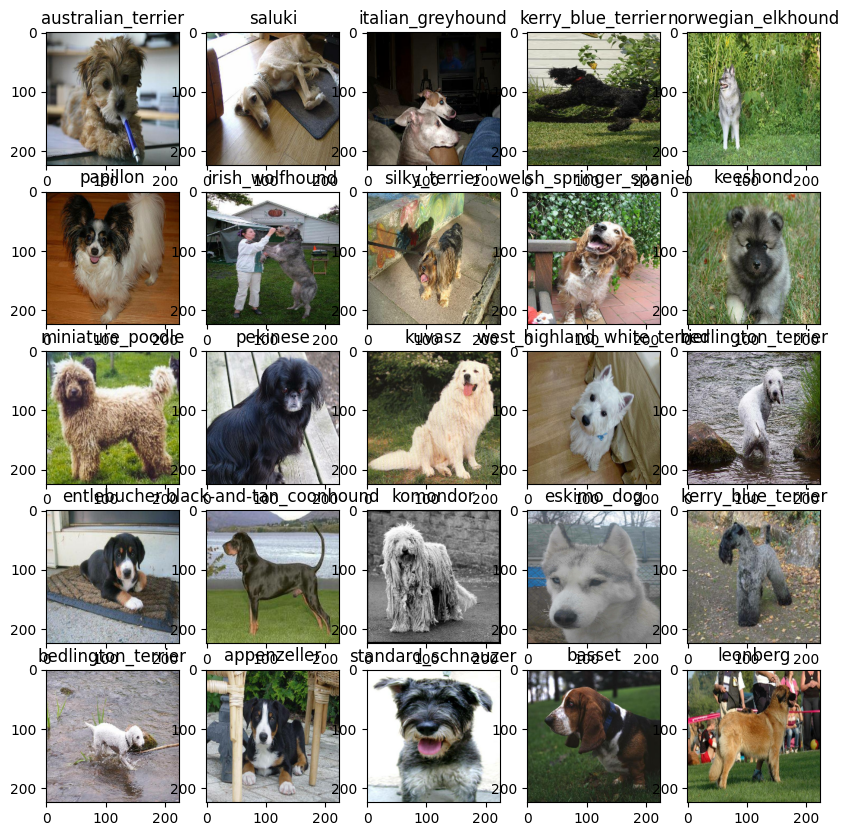

In [40]:
show_25_images(train_images, train_labels)

In [41]:
val_images, val_labels = next(train_data.as_numpy_iterator())

# Before building the model
1. Determine the shape of input and output
2. URL of model

For deep learning models, following models can be used:
1. TensorFlow Hub
2. PyTorch Hub

In [42]:
INPUT_SHAPE = [None, img_size, img_size, 3]
OUTPUT_SHAPE = len(unique_breeds)

In [43]:
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [44]:
#Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation='softmax')  #Softmax is used for multiclass classification
#Sigmoid for binary classification
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)
  return model

In [45]:
model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [47]:
#tensorboard callback
%load_ext tensorboard


In [48]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/logs",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return TensorBoard(logdir)


In [49]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1)

In [50]:
NUM_EPOCKS = 180 #@param {type:"slider", min:100, max:1000, step:10}

In [51]:
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
          epochs=NUM_EPOCKS,
          validation_data=val_data,
          validation_freq=1,
          callbacks=[tensorboard, early_stopping])
  return model

In [52]:
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/180
25/25 [==============================] - 109s 3s/step - loss: 4.5061 - accuracy: 0.1225 - val_loss: 3.2776 - val_accuracy: 0.2750
Epoch 2/180
25/25 [==============================] - 4s 152ms/step - loss: 1.5863 - accuracy: 0.6950 - val_loss: 2.1161 - val_accuracy: 0.5050
Epoch 3/180
25/25 [==============================] - 3s 132ms/step - loss: 0.5496 - accuracy: 0.9475 - val_loss: 1.6494 - val_accuracy: 0.5650
Epoch 4/180
25/25 [==============================] - 3s 119ms/step - loss: 0.2490 - accuracy: 0.9837 - val_loss: 1.4900 - val_accuracy: 0.5950
Epoch 5/180
25/25 [==============================] - 3s 117ms/step - loss: 0.1417 - accuracy: 0.9962 - val_loss: 1.4050 - val_accuracy: 0.6150
Epoch 6/180
25/25 [==============================] - 4s 150ms/step - loss: 0.0977 - accuracy: 1.0000 - val_loss: 1.3642 - val_accuracy: 0.6250
Epoch 7/180
25/25 [==============================

In [53]:
!tensorboard dev upload --logdir /content/drive/MyDrive/logs --one_shot


2023-04-22 06:05:17.975897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/drive/MyDrive/logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.9/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File

# Prediction

In [54]:
# Make predictions on validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 50s 90ms/step


array([[4.92676999e-03, 4.61662479e-04, 1.63523527e-03, ...,
        1.39458128e-03, 4.60678166e-05, 8.88745859e-03],
       [1.71062304e-03, 1.76512857e-03, 2.14697998e-02, ...,
        9.12776042e-04, 4.85730823e-03, 4.19481541e-04],
       [3.93598793e-06, 1.51720888e-05, 3.52913048e-05, ...,
        3.94618255e-05, 1.93630658e-05, 1.48817067e-04],
       ...,
       [2.39579799e-06, 1.15069888e-04, 2.52041923e-06, ...,
        1.47195369e-05, 6.75371257e-06, 1.53656274e-05],
       [3.15438583e-03, 1.11413375e-03, 5.79481894e-05, ...,
        9.51229304e-05, 1.41713565e-04, 1.71814319e-02],
       [6.51022769e-04, 1.03568455e-04, 1.37134828e-03, ...,
        1.09247928e-02, 2.77754199e-03, 8.47348827e-04]], dtype=float32)

In [55]:
predictions.shape

(200, 120)

In [56]:
index = 74
print(predictions[index])
print(f"Max value (Probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[7.42500561e-06 1.94492950e-05 2.89970048e-05 3.53711075e-05
 4.36017872e-04 2.56044841e-05 1.21384155e-05 1.71660795e-04
 1.67922728e-04 2.41083744e-05 7.42675911e-05 1.87354108e-05
 1.55298691e-03 3.32981544e-05 5.22599323e-04 5.62985588e-06
 2.07028970e-05 9.81274061e-05 1.08528707e-06 5.29906210e-05
 1.64016437e-05 4.91982501e-05 6.93394104e-04 7.29760868e-05
 4.40867338e-03 3.65873675e-05 5.08335518e-07 3.36103039e-05
 9.23689187e-01 5.40362271e-05 1.83146221e-05 2.00134076e-04
 2.23176194e-05 3.45745619e-04 5.46150317e-04 3.28326933e-05
 1.30409084e-04 1.70840544e-03 9.16632853e-05 1.10042944e-04
 1.83902928e-04 3.02748012e-05 8.62129746e-05 5.15468069e-04
 4.43286821e-03 7.08308562e-06 2.19188223e-06 2.41386029e-03
 3.02608860e-05 1.20923268e-02 2.27979381e-05 3.63982690e-06
 5.08838275e-04 4.23983816e-04 3.68215806e-05 7.66323210e-05
 6.39926316e-03 2.19922556e-04 6.09003437e-05 2.43306640e-05
 6.75841102e-06 3.12894167e-06 1.03537441e-05 8.60995933e-05
 5.07503864e-05 3.265152

In [57]:
unique_breeds[28]

'chesapeake_bay_retriever'

In [58]:
# Turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[74])
pred_label

'chesapeake_bay_retriever'

In [59]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [60]:
get_pred_label(labels_[0])

'cairn'

In [61]:
get_pred_label(predictions[0])

'soft-coated_wheaten_terrier'

In [62]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels



In [63]:
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

# Function which 
*takes an array of prediction probabilities, truth labels and images and integers
* converts prediction probabilities to predicted labels
* plots the predicted labels, its predicted probability, truth labels and target image

In [64]:
def plot_pred(prediction_probabilities, labels, images, n=1):

  pred_prob, true_label, image =  prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])


  if pred_label == true_label:
    color='green'

  if pred_label != true_label:
    color='red'
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), color=color)

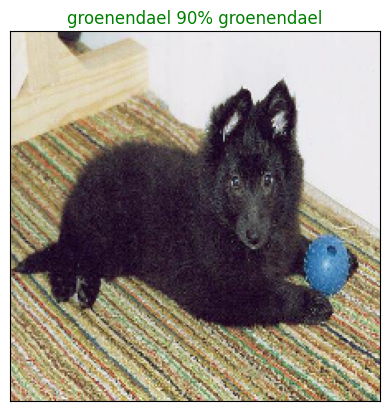

In [65]:
plot_pred(prediction_probabilities= predictions,
          labels=val_labels,
          images=val_images,
          n=77)

#Model's top 10 predictions

In [66]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10 = pred_prob.argsort()[-10:][::-1]
  top_10_values = pred_prob[top_10]
  top_10_labels = unique_breeds[top_10]
  
  top_plot = plt.bar(np.arange(len(top_10_labels)), top_10_values, color='grey')
  plt.xticks(np.arange(len(top_10_labels)), labels=top_10_labels, rotation='vertical')

  if np.isin(true_label, top_10_labels):
    top_plot[np.argmax(top_10_labels == true_label)].set_color('green')

  else:
    pass

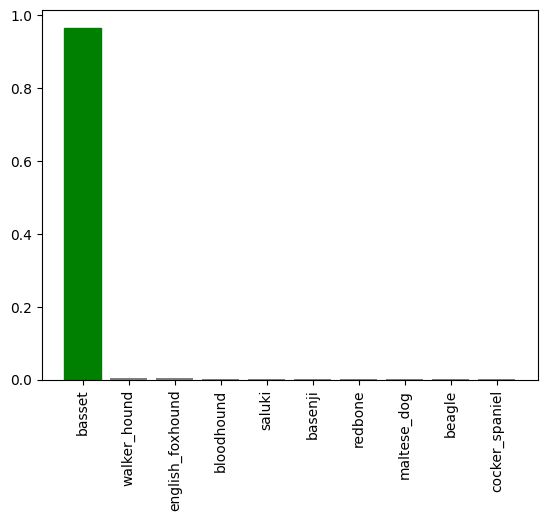

In [67]:
plot_pred_conf(prediction_probabilities = predictions, labels=val_labels, n=2)

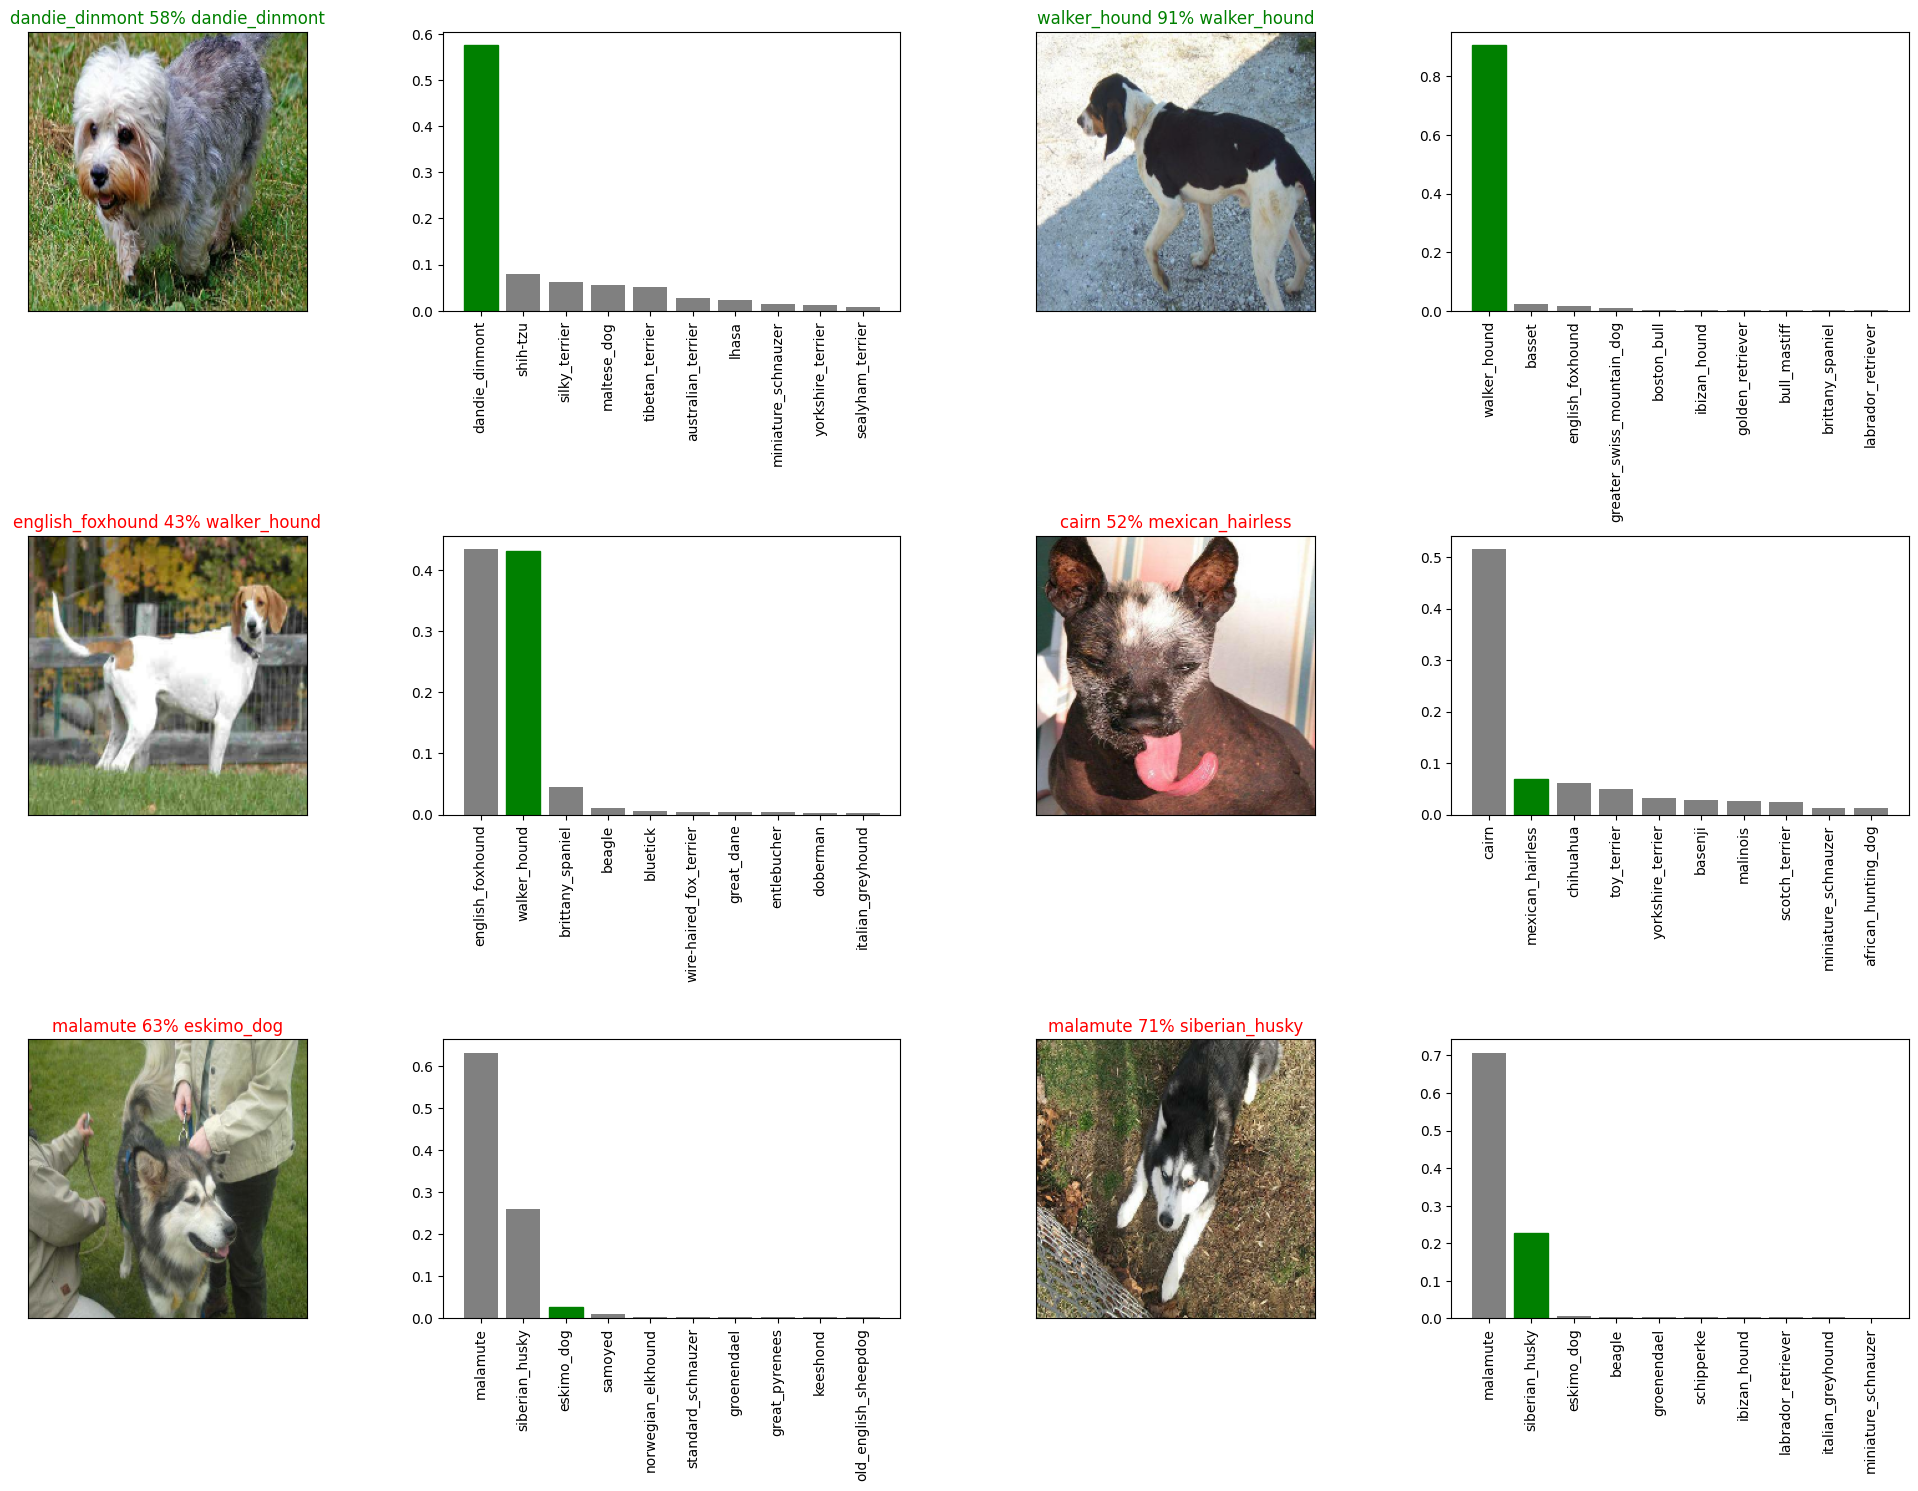

In [68]:
i_multiplier = 30
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities = predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

## Saving and loading a trained model

In [69]:
def save_model(model, suffix=None):

  modeldir = os.path.join("/content/drive/MyDrive/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}")
  model.save(model_path)
  return model_path

In [70]:
def load_model(model_path):

  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

## Training model on full data

In [71]:
X = filenames
Y = boolean_labels

In [72]:
full_data = create_data_batches(X, y=Y, batch_size=32, valid_data=True)

Creating validation data batches...


In [73]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [74]:
full_model_tensorboard = create_tensorboard_callback()

In [75]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [76]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCKS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/180
320/320 [==============================] - 38s 103ms/step - loss: 1.3480 - accuracy: 0.6690
Epoch 2/180
320/320 [==============================] - 33s 103ms/step - loss: 0.4024 - accuracy: 0.8840
Epoch 3/180
320/320 [==============================] - 33s 103ms/step - loss: 0.2331 - accuracy: 0.9412
Epoch 4/180
320/320 [==============================] - 33s 103ms/step - loss: 0.1493 - accuracy: 0.9707
Epoch 5/180
320/320 [==============================] - 33s 104ms/step - loss: 0.1025 - accuracy: 0.9839
Epoch 6/180
320/320 [==============================] - 32s 101ms/step - loss: 0.0743 - accuracy: 0.9918
Epoch 7/180
320/320 [==============================] - 33s 102ms/step - loss: 0.0563 - accuracy: 0.9947
Epoch 8/180
320/320 [==============================] - 32s 101ms/step - loss: 0.0444 - accuracy: 0.9963
Epoch 9/180
320/320 [==============================] - 33s 104ms/step - loss: 0.0361 - accuracy: 0.9975
Epoch 10/180
320/320 [==============================] - 32s 101m

#Making predictions on the dataset

In [116]:
test_path = "/content/drive/MyDrive/Dog Breed Project/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog Breed Project/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e8b49a4b2c22d3c5cb3c88c61654e991.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e85d4e2707683df0e6387e19b67b873d.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e7f95aabf775a636b3893ffa120adaf9.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e8d27c76d6921b27aea1e2da6920396f.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e864f3fc5d19aec4b7a5aa547b359c57.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e807c4b5025b0aa4dcbd5df2765aa8e4.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e870a3586332ab83ddd5821fbc882f42.jpg',
 '/content/drive/MyDrive/Dog Breed Project/test/e800b6c8d2904e205d67ada800907762.jpg']

In [124]:
test_data = create_data_batches(X=test_filenames, y=None, batch_size=32, img_size=224, test_data=True)

Creating test data batches...


In [125]:
test_prediction = full_model.predict(test_data, verbose=1)

324/324 [==============================] - 1166s 4s/step


In [128]:
np.savetxt("/content/drive/MyDrive/Dog Breed Project/Preds.csv", test_prediction, delimiter =",")

In [130]:
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog Breed Project/Preds.csv", delimiter =",")

In [190]:
custom_image_paths = ["/content/drive/MyDrive/Project final stage/labrador-retriever-dog-breed-info.jpg"]

In [191]:
custom_data = create_data_batches(custom_image_paths, y=None, batch_size=32, img_size = 224, test_data=True)

Creating test data batches...


In [192]:
custom_preds = full_model.predict(custom_data)

1/1 [==============================] - 0s 208ms/step


In [193]:
custom_pred_label = get_pred_label(custom_preds[0])
custom_pred_label

'labrador_retriever'

In [195]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

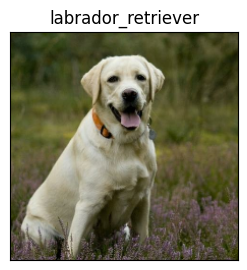

In [197]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_label)
  plt.imshow(image)